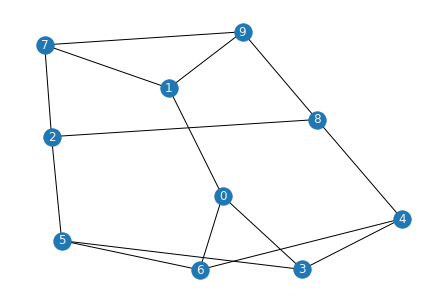

In [42]:
from maxcut_instance_generator import regular_graph

model = regular_graph(num_nodes=10, degree=3, draw=True)

In [43]:
from encoding import RandomAccessEncoder

# Quantum Random Access Encoders
qrac_1_1 = RandomAccessEncoder(1, 1)
qrac_2_1 = RandomAccessEncoder(2, 1)
qrac_3_1 = RandomAccessEncoder(3, 1)

# Hamiltonians
H_1_1 = qrac_1_1.generate_hamiltonian(model)
H_2_1 = qrac_2_1.generate_hamiltonian(model)
H_3_1 = qrac_3_1.generate_hamiltonian(model)

# Print Hamiltonians
# print(qrac_1_1.print_hamiltonian(H_1_1))
# print(qrac_2_1.print_hamiltonian(H_2_1))
print(qrac_3_1.print_hamiltonian(H_3_1))

(0.75+0j)XIXII
(0.75+0j)XIYII
(0.75+0j)XIZII
(0.75+0j)IIXIY
(0.75+0j)IXXII
(0.75+0j)YIIIX
(0.75+0j)YIIIY
(0.75+0j)YIIXI
(0.75+0j)ZIYII
(0.75+0j)IIYIX
(0.75+0j)ZIZII
(0.75+0j)ZIIXI
(0.75+0j)IIZIX
(0.75+0j)IXIIY
(0.75+0j)IXIXI
(-7.5+0j)IIIII
None


In [44]:
print(len(qrac_1_1.qubit_to_vertex_map), len(qrac_1_1.calculate_edge_among_qubits(model)))
print(len(qrac_2_1.qubit_to_vertex_map), len(qrac_2_1.calculate_edge_among_qubits(model)))
print(len(qrac_3_1.qubit_to_vertex_map), len(qrac_3_1.calculate_edge_among_qubits(model)))

10 15
5 8
5 7


In [45]:
import numpy as np
from vqe import VQEForQRAO

from scipy.optimize import minimize

# Example of Level = 1
cost_history_1_1 = []
cost_history_2_1 = []
cost_history_3_1 = []
init_theta_list_1_1 = np.random.random(len(qrac_1_1.qubit_to_vertex_map) * 2 * 3) * 1e-1
init_theta_list_2_1 = np.random.random(len(qrac_2_1.qubit_to_vertex_map) * 2 * 3) * 1e-1
init_theta_list_3_1 = np.random.random(len(qrac_3_1.qubit_to_vertex_map) * 2 * 3) * 1e-1

vqe_1_1 = VQEForQRAO(
    hamiltonian=H_1_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_1_1.calculate_edge_among_qubits(model),
)
vqe_2_1 = VQEForQRAO(
    hamiltonian=H_2_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_2_1.calculate_edge_among_qubits(model),
)
vqe_3_1 = VQEForQRAO(
    hamiltonian=H_3_1, rotation_gate="normal", entanglement="compatible",
    num_layer=1, qubit_pairs=qrac_3_1.calculate_edge_among_qubits(model),
)

cost_history_1_1.append(vqe_1_1._cost_function(init_theta_list_1_1))
cost_history_2_1.append(vqe_2_1._cost_function(init_theta_list_2_1))
cost_history_3_1.append(vqe_3_1._cost_function(init_theta_list_3_1))

method = "COBYLA"
options = {"disp": True, "maxiter": 25000}

num_iter_1_1 = 1
num_iter_2_1 = 1
num_iter_3_1 = 1

def callback_1_1(x):
    global num_iter_1_1
    cost_val_1_1 = vqe_1_1._cost_function(x) 
    cost_history_1_1.append(cost_val_1_1)
    print(f'{num_iter_1_1}/{options["maxiter"]}\t{cost_val_1_1}')
    num_iter_1_1 += 1

def callback_2_1(x):
    global num_iter_2_1
    cost_val_2_1 = vqe_2_1._cost_function(x) 
    cost_history_2_1.append(cost_val_2_1)
    print(f'{num_iter_2_1}/{options["maxiter"]}\t{cost_val_2_1}')
    num_iter_2_1 += 1

def callback_3_1(x):
    global num_iter_3_1
    cost_val_3_1 = vqe_3_1._cost_function(x) 
    cost_history_3_1.append(cost_val_3_1)
    print(f'{num_iter_3_1}/{options["maxiter"]}\t{cost_val_3_1}')
    num_iter_3_1 += 1

print("Iter\tcost")
opt_1_1 = minimize(
    vqe_1_1._cost_function,
    init_theta_list_1_1,
    method=method,
    options=options,
    callback=callback_1_1,
)

print("Iter\tcost")
opt_2_1 = minimize(
    vqe_2_1._cost_function,
    init_theta_list_2_1,
    method=method,
    options=options,
    callback=callback_2_1,
)

print("Iter\tcost")
opt_3_1 = minimize(
    vqe_3_1._cost_function,
    init_theta_list_3_1,
    method=method,
    options=options,
    callback=callback_3_1,
)

Iter	cost
1/25000	-4.238363989209639
2/25000	-4.206167148767385
3/25000	-4.238363989209639
4/25000	-4.612700927487759
5/25000	-4.60199559280134
6/25000	-4.612700927487758
7/25000	-4.9849631241031345
8/25000	-4.971098482935822
9/25000	-4.984963124103135
10/25000	-5.4105900533827285
11/25000	-5.393987353560891
12/25000	-5.4105900533827285
13/25000	-5.67776062312213
14/25000	-5.657470386186101
15/25000	-5.677760623122128
16/25000	-5.928596400100277
17/25000	-5.924581718839222
18/25000	-5.928596400100276
19/25000	-6.193860174801163
20/25000	-6.177036745775506
21/25000	-6.193860174801163
22/25000	-6.3882776914193595
23/25000	-6.376414069054558
24/25000	-6.38827769141936
25/25000	-6.565694420292572
26/25000	-6.559331503990402
27/25000	-6.565694420292571
28/25000	-6.752844953668208
29/25000	-6.745409054826584
30/25000	-6.752844953668209
31/25000	-7.060904875495785
32/25000	-7.060904875495785
33/25000	-6.925237438435556
34/25000	-7.383982695986246
35/25000	-7.38398269598625
36/25000	-7.2529367

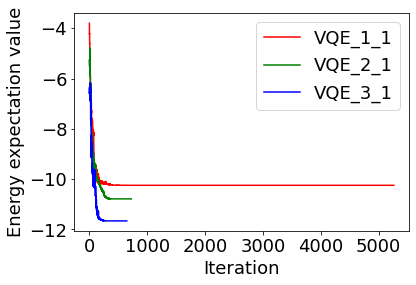

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 18
plt.plot(cost_history_1_1, color="red", label="VQE_1_1")
plt.plot(cost_history_2_1, color="green", label="VQE_2_1")
plt.plot(cost_history_3_1, color="blue", label="VQE_3_1")
plt.xlabel("Iteration")
plt.ylabel("Energy expectation value")
plt.legend()
plt.show()

In [47]:
from rounding import MagicRounding
mr_1_1 = MagicRounding(1, 1, 10000, vqe_1_1, qrac_1_1)
mr_2_1 = MagicRounding(2, 1, 10000, vqe_2_1, qrac_2_1)
mr_3_1 = MagicRounding(3, 1, 10000, vqe_3_1, qrac_3_1)
best_theta_list_1_1 = opt_1_1.x
best_theta_list_2_1 = opt_2_1.x
best_theta_list_3_1 = opt_3_1.x

In [49]:
sol_counts_1_1 = mr_1_1.round(best_theta_list_1_1)
sol_counts_2_1 = mr_2_1.round(best_theta_list_2_1)
sol_counts_3_1 = mr_3_1.round(best_theta_list_3_1)

from qiskit_optimization.translators import from_docplex_mp
# from_docplex_mp(model).objective.evaluate(list(sol_counts_1_1.keys())[0])
print(model.solve())
print(np.asarray([int(bit) for bit in list(sol_counts_1_1.keys())[0]]))

solution for: maxcut
objective: 13
x1=1
x2=1
x3=1
x6=1
x9=1

[1 0 1 0 1 1 0 0 0 1]


In [50]:
from_docplex_mp(model).objective.evaluate(np.asarray([int(bit) for bit in list(sol_counts_1_1.keys())[0]]))

13.0

In [53]:
from collections import defaultdict
solutions = defaultdict(lambda: 0, {})
for key, count in sol_counts_2_1.items():
    objective = from_docplex_mp(model).objective
    print(objective.evaluate(np.asarray([int(bit) for bit in key])), count)

6.0 96
6.0 14
12.0 136
12.0 20
10.0 7
6.0 10
0.0 6
8.0 2
8.0 13
8.0 4
10.0 7
6.0 2
8.0 2
8.0 1
6.0 1
6.0 2
8.0 1
6.0 1
8.0 1
9.0 87
13.0 142
7.0 8
9.0 5
7.0 15
3.0 14
11.0 12
7.0 10
9.0 6
7.0 15
7.0 1
3.0 2
7.0 2
7.0 2
3.0 1
7.0 1
7.0 1
7.0 1
3.0 85
9.0 135
5.0 2
5.0 1
9.0 18
3.0 18
7.0 12
9.0 16
7.0 5
9.0 8
9.0 7
7.0 2
7.0 9
7.0 3
7.0 6
9.0 2
7.0 3
11.0 2
10.0 147
6.0 8
6.0 100
8.0 12
8.0 9
4.0 7
8.0 2
10.0 18
8.0 1
8.0 13
6.0 3
8.0 7
8.0 2
6.0 1
8.0 3
7.0 19
9.0 95
9.0 132
11.0 18
3.0 10
11.0 13
7.0 8
7.0 1
9.0 2
3.0 5
9.0 6
7.0 1
7.0 2
7.0 1
7.0 1
10.0 23
12.0 75
10.0 114
6.0 2
8.0 11
4.0 16
10.0 6
8.0 9
6.0 8
6.0 18
8.0 7
6.0 3
4.0 3
8.0 1
8.0 1
6.0 1
6.0 1
6.0 135
6.0 82
8.0 5
10.0 1
8.0 8
6.0 9
8.0 6
6.0 9
8.0 6
8.0 17
8.0 11
10.0 1
6.0 1
8.0 1
8.0 3
6.0 3
6.0 1
6.0 1
6.0 1
7.0 156
9.0 75
5.0 8
7.0 12
7.0 14
9.0 12
7.0 16
7.0 1
7.0 10
9.0 1
9.0 7
9.0 2
7.0 1
9.0 2
7.0 1
9.0 1
7.0 1
7.0 83
7.0 13
11.0 159
7.0 2
9.0 18
3.0 9
3.0 2
9.0 6
5.0 3
9.0 1
9.0 2
9.0 2
9.0 1
9.0 4
9.0 5
9.0

In [52]:
from_docplex_mp(model).objective.evaluate(np.asarray([int(bit) for bit in list(sol_counts_3_1.keys())[0]]))

9.0